In [1]:
%load_ext autoreload
%autoreload 2

In [9]:
import numpy as np
from vae.arch import VAE
import matplotlib.pyplot as plt
import os
from IPython import display
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider
import ipywidgets as widgets
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model


np.set_printoptions(precision=4, suppress = True)

In [18]:
vae = VAE()
#model = create_model()

vae.set_weights('./vae/weights.h5')
#load_weights("./vae/GAN/weight.h5")
#model.load_weights("./vae/GAN/weight.h5")

In [ ]:
DIR_NAME = './data/rollout/'
file = os.listdir(DIR_NAME)[200]
print(file)
obs_data = np.load(DIR_NAME + file)['obs']
print(obs_data.shape)

In [ ]:
plot_model(vae.encoder, to_file='./vae/encoder.png', show_shapes=True)
plot_model(vae.decoder, to_file='./vae/decoder.png', show_shapes=True)

In [ ]:
for idx in range(0,300):
    plt.gca().cla() 
    
    obs = obs_data[idx]
    z_decoded = vae.full_model.predict(np.array([obs]))[0]
    
    #plt.subplot(121)
    #plt.imshow( obs)
    #plt.subplot(122)
    plt.imshow( z_decoded)
    plt.savefig('vaegan/'+str(idx)+'.png')
#     plt.show()
    #display.clear_output(wait=True)
    #display.display(plt.gcf()) 

NameError: name 'obs_data' is not defined

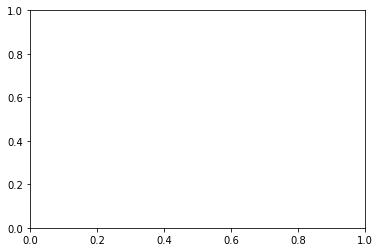

In [4]:
### output from one episode

for idx in range(0,300):
    plt.gca().cla() 
    
    obs = obs_data[idx]
    z_decoded = vae.full_model.predict(np.array([obs]))[0]
    
    plt.subplot(121)
    plt.imshow( obs)
    plt.subplot(122)
    plt.imshow( z_decoded)
    
#     plt.show()
    display.clear_output(wait=True)
    display.display(plt.gcf()) 

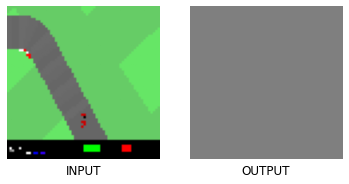

In [5]:
### output from the full_model
DIR_NAME = './data/rollout/'
file = os.listdir(DIR_NAME)[179]
obs_data = np.load(DIR_NAME + file)['obs']

obs = obs_data[50]
reconstruction = vae.full_model.predict(np.array([obs]))[0]

ax1 = plt.subplot(121)
plt.imshow( obs)
ax1.axis('off')
ax1.text(0.5,-0.1, "INPUT", size=12, ha="center", 
         transform=ax1.transAxes)

ax2 = plt.subplot(122)
plt.imshow( reconstruction)
ax2.axis('off')
ax2.text(0.5,-0.1, "OUTPUT", size=12, ha="center", 
         transform=ax2.transAxes);


In [9]:
mus, log_vars, _  = vae.encoder.predict(np.array([obs]))
mu = mus[0]
log_var = log_vars[0]
print("mu = " + str(mu))
print("log_var = " + str(log_var))

encoded_z = vae.encoder.predict(np.array([obs]))[0]
print("z = " + str(encoded_z))

mu = [ 0.5238  0.4426  0.3514 -0.0118 -0.3443 -0.0703  0.2031  1.1464 -0.323
 -0.1646  0.2765  0.7718  0.3984  0.3598 -0.0101 -0.7293  0.1879  1.1204
 -0.2258 -0.0997 -0.4607  0.0325  1.7904 -0.0536  0.9432 -0.1057  0.235
  0.0511  0.0424 -0.4325 -0.0901  0.0774]
log_var = [-0.274  -0.2447 -0.0549  0.0001 -1.3993 -0.1997 -0.3888 -2.1598 -0.2255
 -0.4682 -0.461  -0.3213 -0.092  -0.1057 -0.1618  0.0786 -0.3868 -0.1738
 -0.8659 -0.3129 -0.4464 -0.2442 -1.9883 -0.3649 -0.4015  0.0761 -0.7584
 -0.2166  0.0864 -0.3103 -0.5682 -0.0206]
z = [[ 0.5238  0.4426  0.3514 -0.0118 -0.3443 -0.0703  0.2031  1.1464 -0.323
  -0.1646  0.2765  0.7718  0.3984  0.3598 -0.0101 -0.7293  0.1879  1.1204
  -0.2258 -0.0997 -0.4607  0.0325  1.7904 -0.0536  0.9432 -0.1057  0.235
   0.0511  0.0424 -0.4325 -0.0901  0.0774]]


informative dimensions:


array([ 4,  7, 18, 22, 26, 30])

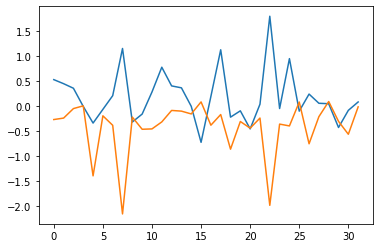

In [10]:
plt.plot(mu);
plt.plot(log_var);
print('informative dimensions:')
hot_zs = np.where(abs(log_var) > 0.5)[0]
hot_zs

In [11]:
file1 = os.listdir(DIR_NAME)[100]
obs_data1 = np.load(DIR_NAME + file)['obs']
file2 = os.listdir(DIR_NAME)[140]
obs_data2 = np.load(DIR_NAME + file)['obs']

In [12]:
vae.encoder.predict(np.array([obs_data1[20]]))

[array([[ 0.8621,  0.5878, -0.451 ,  0.2104, -0.9426,  1.0238,  0.7059,
          0.8001,  0.4384, -0.5626,  1.1439,  0.2666,  0.5134,  0.0678,
          0.2055, -0.1814,  0.7902, -0.3553, -0.9152,  0.4837, -0.5598,
         -0.2488,  0.9532,  1.0132,  0.7174, -0.6569, -1.5154,  0.6426,
          0.6876, -0.4097,  0.6029,  0.8099]], dtype=float32),
 array([[-0.3043, -0.4609, -0.0903, -0.1146, -1.6092, -0.5098, -0.3968,
         -2.5312, -0.0475, -0.1176, -0.4496, -0.1096, -0.2583, -0.0627,
         -0.0533, -0.0691, -0.546 , -0.5516, -1.3228, -0.4431, -0.2154,
         -0.4902, -2.5284, -0.7547, -0.4018, -0.3229, -0.4589, -0.3206,
         -0.0938, -0.1121, -0.6638, -0.2394]], dtype=float32),
 array([[ 0.1988,  0.6187, -1.1711, -2.2161, -1.3532,  1.3474,  1.6285,
          1.0332,  1.1973, -0.5966,  0.7143, -0.0455,  1.3139,  0.1888,
          1.0636,  1.625 ,  1.2665, -0.1077, -0.4445, -0.1424, -1.1194,
         -0.5587,  0.7581,  1.397 ,  0.2269,  0.7721, -2.2953,  0.4083,
          

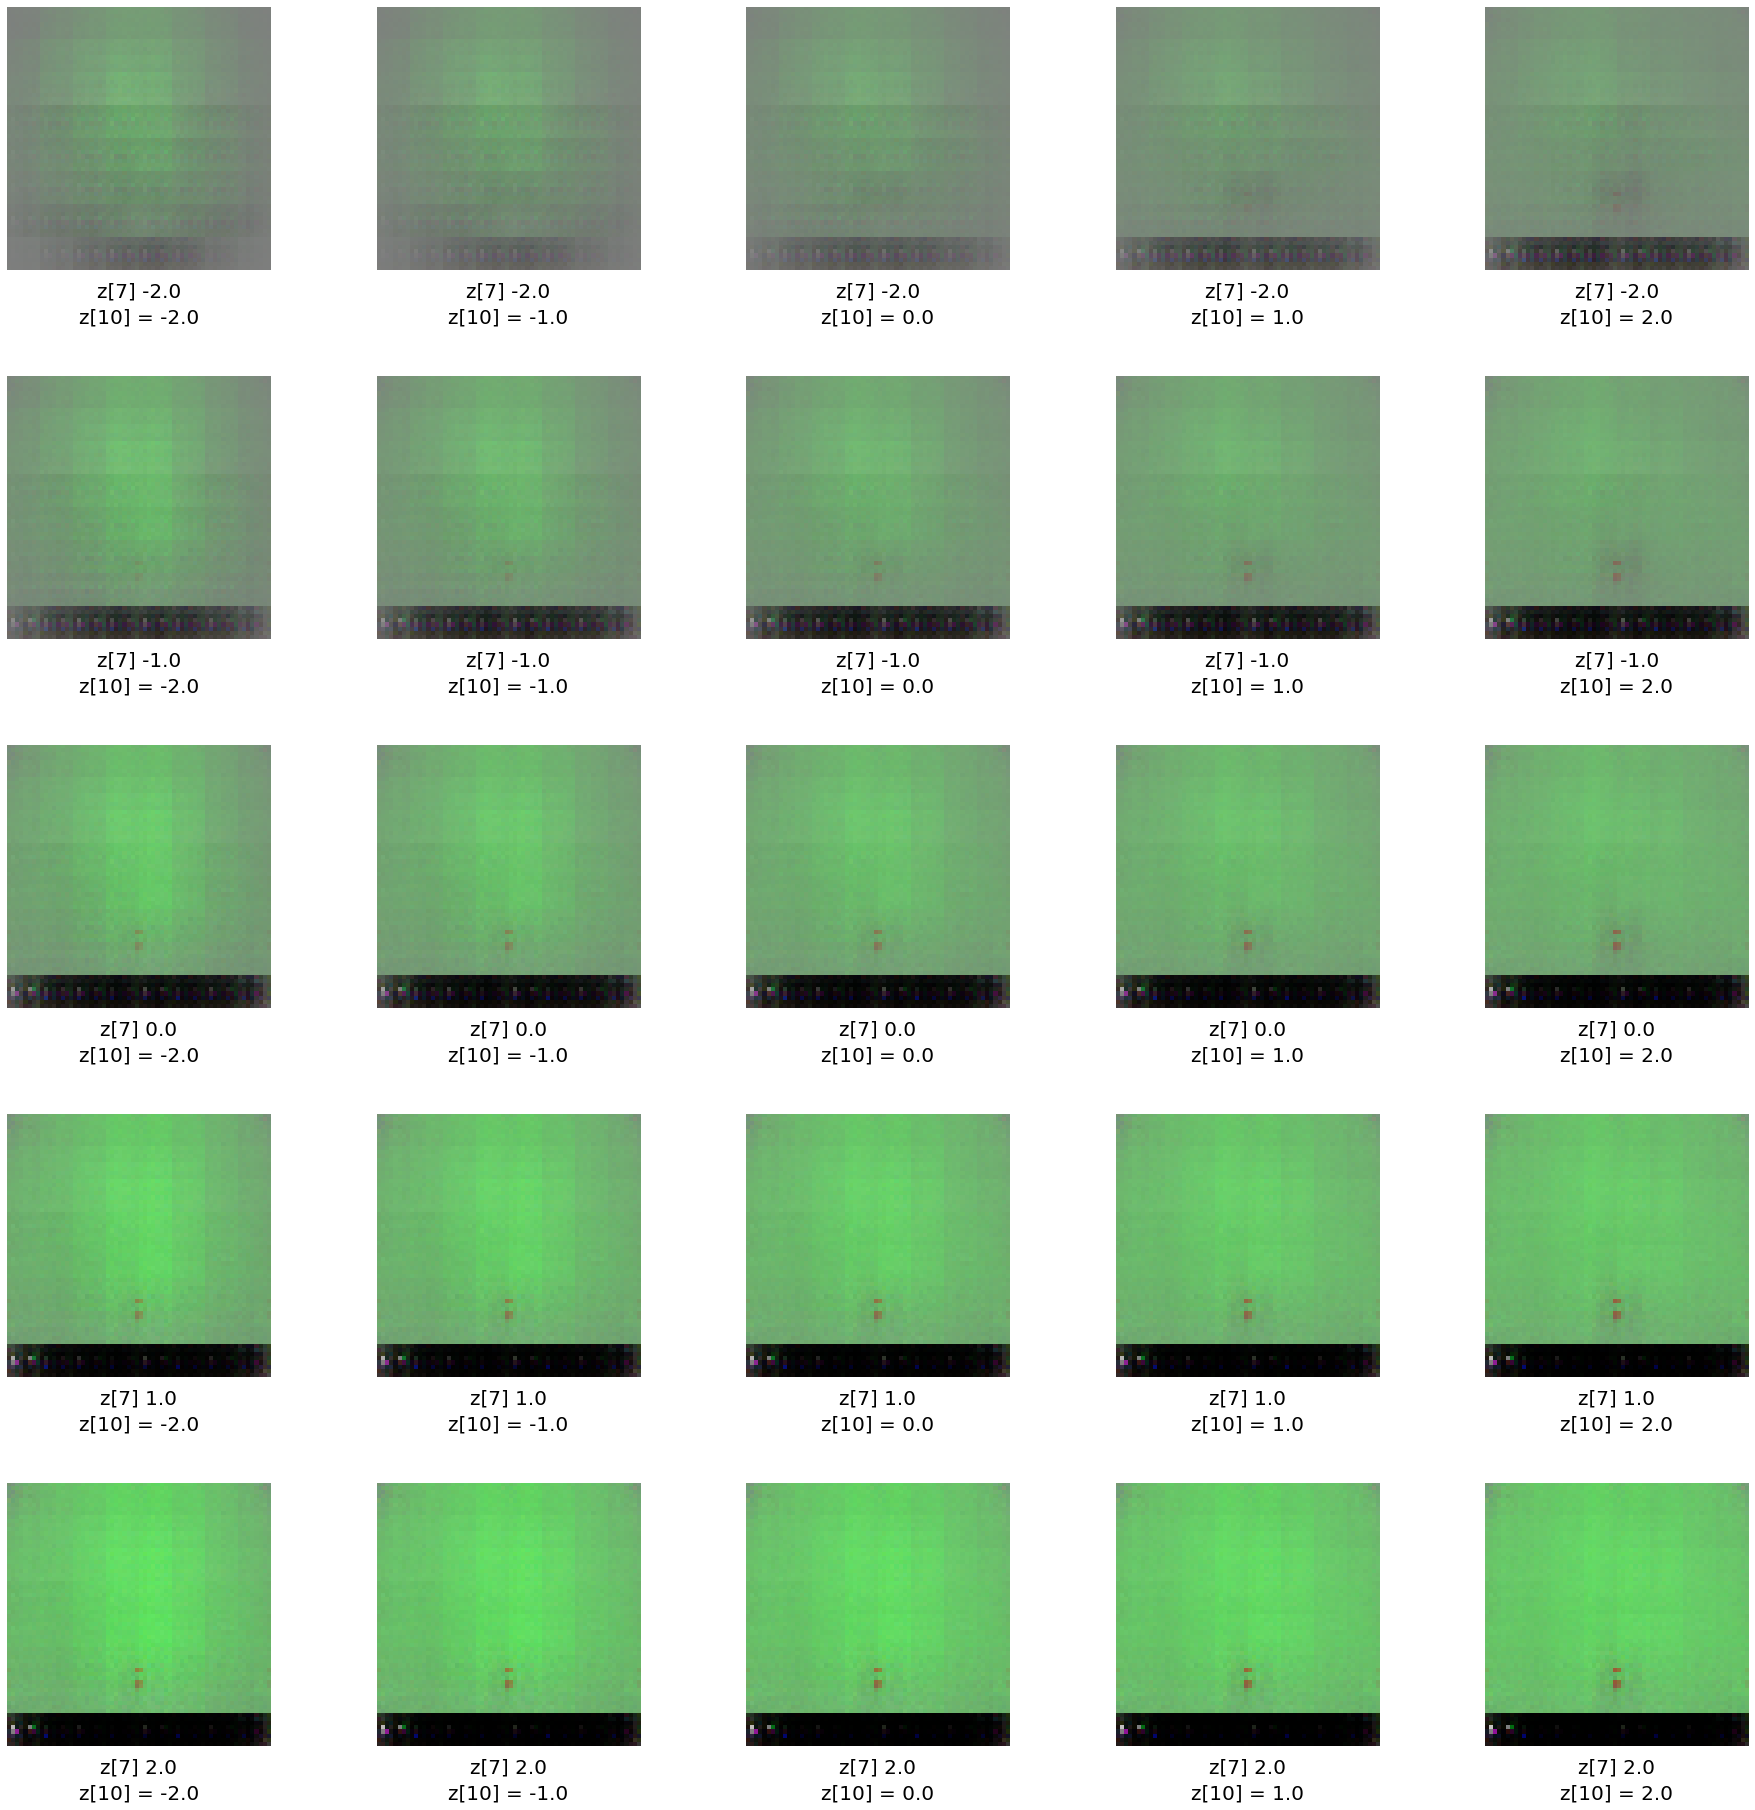

In [13]:
top_left = vae.encoder.predict(np.array([obs_data1[20]]))[2][0]
top_right = vae.encoder.predict(np.array([obs_data1[60]]))[2][0]
bottom_left = vae.encoder.predict(np.array([obs_data2[80]]))[2][0]
sample_z = vae.encoder.predict(np.array([obs_data[60]]))[2][0]

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(32,32), sharex=True, sharey=True)
plt.subplots_adjust(hspace = 0.4)

for x in range(5):
    for y in range(5):
        
        z = sample_z.copy()

#         z = top_left + (top_right - top_left) * x/8 + (bottom_left - top_left) * y/8
        z[7] = (x-2)
        z[10] = (y-2)
        
        decoded_obs = vae.decoder.predict(np.array([z]))[0]
        
        axes[x,y].set_axis_off()
        
        axes[x,y].imshow(decoded_obs)
        
        axes[x,y].text(0.5,-0.1, 'z[7] ' + str(np.round(z[7],2)), size=20, ha="center", 
                       transform=axes[x,y].transAxes)
        
        axes[x,y].text(0.5,-0.2, 'z[10] = ' + str(np.round(z[10],2)), size=20, ha="center", 
                       transform=axes[x,y].transAxes)
    

plt.show()

In [14]:
def play_with_z(z0 = sample_z[0]
                ,z2 = sample_z[2]
                ,z4 = sample_z[4]
                ,z5 = sample_z[5]
                ,z6 = sample_z[6]
                ,z7 = sample_z[7]
                ,z10 = sample_z[10]
                ,z15 = sample_z[15]
                ,z24= sample_z[24]
                ,z25= sample_z[25]
                ,z27= sample_z[27]
                ):
    z = sample_z.copy()
    z[0] = z0
    z[2] = z2
    z[4] = z4
    z[5] = z5
    z[6] = z6
    z[7] = z7
    z[10] = z10
    z[15] = z15
    z[24] = z24
    z[25] = z25
    z[27] = z27
    
    decoded_obs = vae.decoder.predict(np.array([z]))[0]
    plt.gca().cla() 
    plt.imshow( decoded_obs)

In [15]:
interact(play_with_z
        , z0=(-3.0,3.0,0.1)
        , z2=(-3.0,3.0,0.1)
        , z4=(-3.0,3.0,0.1)
        , z5=(-3.0,3.0,0.1)
        , z6=(-3.0,3.0,0.1)
        , z7=(-3.0,3.0,0.1)
        , z10=(-3.0,3.0,0.1)
        , z15=(-3.0,3.0,0.1)
        , z24=(-3.0,3.0,0.1)
        , z25=(-3.0,3.0,0.1)
        , z27=(-3.0,3.0,0.1)
        )

interactive(children=(FloatSlider(value=-0.40778234601020813, description='z0', max=3.0, min=-3.0), FloatSlide…

<function __main__.play_with_z(z0=-0.40778235, z2=-0.28324723, z4=-0.9723767, z5=0.07200249, z6=-0.92072576, z7=1.6988126, z10=-0.11837247, z15=-0.9048312, z24=-0.62739295, z25=1.0610371, z27=-0.8487841)>